# Adding Meta Data to a PNG File

This tutorial shows how to use the module `tropy.plotting_tools.meta2png`.

## Introduction

### Problem Statement

We often have the situation that an image is generated with a python script. If you find that image (years) later, you like to have an easy way to find the script that made the image. 

### Suggested Solution

A possible solution is to write source filename and author name into the image meta data. Then, you can search for this info in the meta data. This info also remains attached to the file once you distribute your image.


A linux-based command to screen the meta data is

```
identify -verbose  ${IMAGE_NAME} | grep Author
identify -verbose  ${IMAGE_NAME} | grep Source
```

## Import Libraries

In [1]:
%matplotlib inline

# standard libs
import numpy as np

# plotting and mapping
import pylab as plt

# the own tropy lib
from tropy.plotting_tools.meta2png import pngsave

## Making Example Data 

We make some random example data for plotting. 

In [2]:
nrow, ncol = 180, 200
x = np.linspace(0, 1, ncol)
y = np.linspace(0, 1, nrow)

r = 4 * np.random.randn( nrow, ncol )


## Make a Plot

First, we plot the random data with internally defined levels.

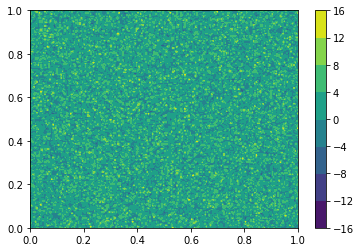

In [3]:
plt.contourf(x, y, r)
plt.colorbar()

## Saving the Plot as PNG

### Standard Way

In [4]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

I implemented a functionality for adding metadata to `tropy.plotting_tools.meta2png`. We use the class `pngsave` similarily to `plt.savefig`

In [5]:
help( pngsave )

Help on class pngsave in module tropy.plotting_tools.meta2png:

class pngsave(builtins.object)
 |  pngsave(*args, **kwargs)
 |  
 |  That class is designed to save pylab figures in png and add meta data.
 |  
 |  
 |  Parameters
 |  ----------
 |  *args : list
 |      other positional arguments passed to `plt.savefig`
 |  
 |  **kwargs : dict
 |      other optional arguments passed to `plt.savefig``
 |  
 |      'author' : Place yeur name into author keyword 
 |      
 |      'source' : Specify your source filename if needed,
 |                 if not set, it tries to automatically find the filename
 |  
 |      'notebook' : {False, True} if you are working in a notebook
 |  
 |  Methods defined here:
 |  
 |  __call__(self, fname, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  meta(self)
 |      Set the meta data, esp. the Author name and Source file information.
 |  
 

In [6]:
pngsave('test_withmeta.png', author = 'Hans Wurst');

... save image to  test_withmeta.png


<Figure size 432x288 with 0 Axes>

In [7]:
!identify -verbose test_withmeta.png | grep Author

    Author: Hans Wurst


In [8]:
!identify -verbose test_withmeta.png | grep Source

    Source: /vols/fs1/store/senf/proj/2018-05_pypackage_devel/tropy-tutorials/docs/source//vols/fs1/store/senf/.conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py


This is the place were the source filename appears.

__Bug with Jupyter__

* It is well working with python scripts,
* but not with jupyter notebooks. Sorry for this ... there might be a clever solution in future...

## Solving the Notebook Issue

Here, I give a solution to the notebook issue. However, it is not a nice and convenient way.

1. You need to run the function below in a notebook (unfortunately it is not working within a python module)
2. And then explicitly provide the name to `pngsave`

### Getting the Notebook Name

In [33]:
from IPython.core.display import Javascript
from IPython.display import display
import os

def get_notebook_name():
    """Returns the name of the current notebook as a string
    
    From From https://mail.scipy.org/pipermail/ipython-dev/2014-June/014096.html
    """
    display(Javascript('IPython.notebook.kernel.execute("theNotebook = " + \
    "\'"+IPython.notebook.notebook_name+"\'");'))
    
    #
    nb_full_path = os.path.join(os.getcwd(), theNotebook)
    
    return os.path.join(os.getcwd(), theNotebook)


def pngkws(name):
    
    kws = dict()
    kws['author'] = name
    kws['source'] = get_notebook_name()
    
    return kws
    

In [34]:
source = get_notebook_name()
print( source )

<IPython.core.display.Javascript object>

/vols/fs1/store/senf/proj/2018-05_pypackage_devel/tropy-tutorials/docs/source/Adding_Meta-Data_to_PNG_File.ipynb


In [36]:
print( pngkws('Hans Wurst') )

<IPython.core.display.Javascript object>

{'author': 'Hans Wurst', 'source': '/vols/fs1/store/senf/proj/2018-05_pypackage_devel/tropy-tutorials/docs/source/Adding_Meta-Data_to_PNG_File.ipynb'}


In [37]:
pngsave('test_withmeta.png', **pngkws('Hans Wurst'));

<IPython.core.display.Javascript object>

... save image to  test_withmeta.png


<Figure size 432x288 with 0 Axes>

In [38]:
!identify -verbose test_withmeta.png | grep Source

    Source: /vols/fs1/store/senf/proj/2018-05_pypackage_devel/tropy-tutorials/docs/source/Adding_Meta-Data_to_PNG_File.ipynb


**Now it works! Yeah!**

## Summary

The module `tropy.plotting_tools.meta2png`  help you to 

* place meta data into PNG files
* when `savepng` is used it automatically places name and source info into png.